This Notebook will Demo BATMAN: A Python Package for Fast Calculation of Exoplanet Transit Light Curves. The script was provided by the BATMAN team. Some comments and markdown cells were added for the sake of better understand the BATMAN package by Carlos E. Cruz-Arce

In [2]:
#importing necessary packages
import batman
import numpy as np
import matplotlib.pyplot as plt

Example of basic BATMAN usage to calculate a model light curve with quadratic limb darkening.

In [3]:
#Next we create a TransitParams object to store the physical parameters describing the transit:
params = batman.TransitParams()
params.t0 = 0.                       #time of inferior conjunction
params.per = 1.                      #orbital period
params.rp = 0.1                      #planet radius (in units of stellar radii)
params.a = 15.                       #semi-major axis (in units of stellar radii)
params.inc = 87.                     #orbital inclination (in degrees)
params.ecc = 0.                      #eccentricity
params.w = 90.                       #longitude of periastron (in degrees), w=90 for circular orbits
params.u = [0.1, 0.3]                #limb darkening coefficients [u1, u2]
params.limb_dark = "quadratic"       #limb darkening model

In [4]:
#We also need to specify the times at which we wish to calculate the model:
t = np.linspace(-0.05, 0.05, 100)   #in days

Using these parameters, we initialize the model and calculate a model light curve:

In [5]:
m = batman.TransitModel(params, t)    #initializes model
flux = m.light_curve(params)          #calculates light curve

Easy as that, you have your lightkurve!

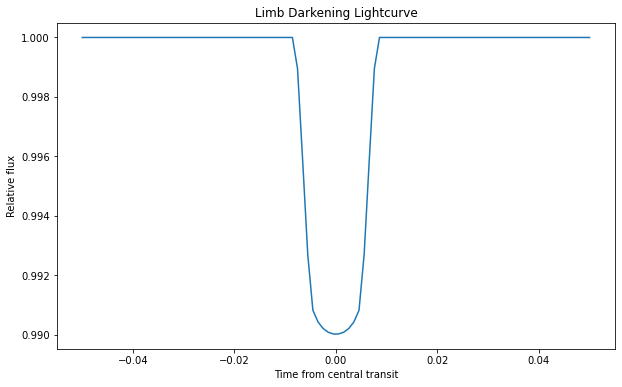

In [7]:
#Now just go ahead and plot your lightcurve!
plt.figure(figsize=(10,6))
plt.plot(t, flux)
plt.xlabel("Time from central transit")
plt.ylabel("Relative flux")
plt.title("Limb Darkening Lightcurve")
plt.show()

What about for a nonlinear limb darkening model?
We got you right here!

In [9]:
params2 = batman.TransitParams()       #object to store transit parameters
params2.t0 = 0.                        #time of inferior conjunction
params2.per = 1.                       #orbital period
params2.rp = 0.1                       #planet radius (in units of stellar radii)
params2.a = 15.                        #semi-major axis (in units of stellar radii)
params2.inc = 87.                      #orbital inclination (in degrees)
params2.ecc = 0.                       #eccentricity
params2.w = 90.                        #longitude of periastron (in degrees)
params2.limb_dark = "nonlinear"        #limb darkening model
params2.u = [0.5, 0.1, 0.1, -0.1]      #limb darkening coefficients [u1, u2, u3, u4]

time = np.linspace(-0.025, 0.025, 100)  #times at which to calculate light curve
n = batman.TransitModel(params2, time)    #initializes model

Now we can make the lightkurve, same as before

In [10]:
flux2 = n.light_curve(params2)                    #calculates light curve

....Or we can have some fun and plot mutliple lightcurves for different planet radii :)

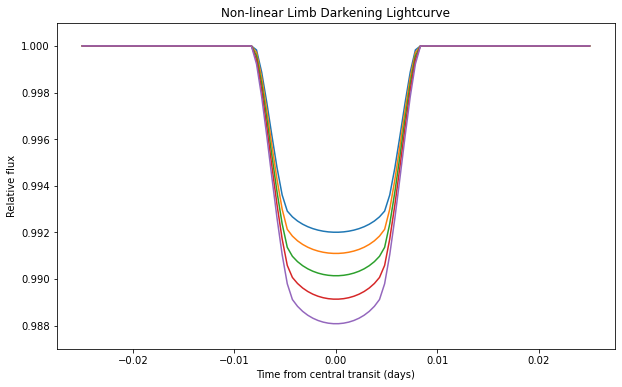

In [11]:
plt.figure(figsize=(10,6))
radii = np.linspace(0.09, 0.11, 5)
for r in radii:
        params2.rp = r                           #updates planet radius
        new_flux = n.light_curve(params2)        #recalculates light curve
        plt.plot(time, new_flux)
        plt.xlabel("Time from central transit (days)")
        plt.ylabel("Relative flux")
        plt.ylim((0.987, 1.001))
        plt.title('Non-linear Limb Darkening Lightcurve')  #Red is about rp = .1,purple is .11, blue is about rp = .09
#As we can see the smaller the planet's radius, the less dip or "shadow" you see in the lightcurve        

What other options are there for the limb darkening parameter?
1. “uniform” 
2. “linear” 
3. “quadratic” 
4. “square-root” 
5. “logarithmic” 
6. “exponential” 
7. “power2” (from Morello et al. 2017)
8. “nonlinear”

<Figure size 432x288 with 0 Axes>

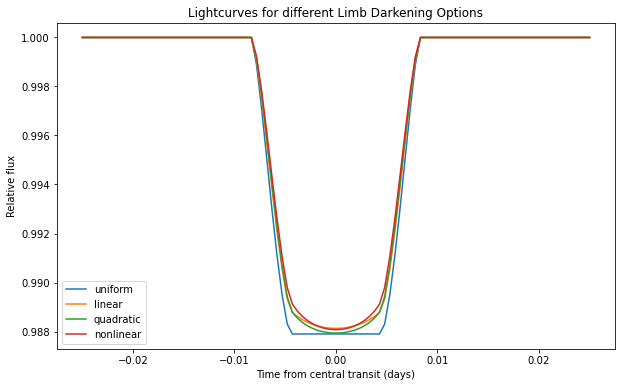

In [15]:
ld_options = ["uniform", "linear", "quadratic", "nonlinear"]
ld_coefficients = [[], [0.3], [0.1, 0.3], [0.5, 0.1, 0.1, -0.1]]

plt.figure()
plt.figure(figsize=(10,6))
for i in range(4):
        params2.limb_dark = ld_options[i]             #specifies the LD profile
        params2.u = ld_coefficients[i]                #updates LD coefficients
        k = batman.TransitModel(params2, time)        #initializes the model
        flux3 = k.light_curve(params2)                #calculates light curve
        plt.plot(time, flux3, label = ld_options[i])
        plt.legend()
        plt.xlabel("Time from central transit (days)")
        plt.ylabel("Relative flux")
        plt.title('Lightcurves for different Limb Darkening Options')  